In [18]:
import os
import sys
import math
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [21]:
RANDOM_STATE = 42

In [10]:
## Folder Locations
TEST_IMAGE_FOLDER = '../data/raw/Test/testset'
TEST_CSV = '../data/raw/Test/testset.csv'

TRAIN_IMAGE_FOLDER = '../data/raw/Train/testset'
TRAIN_CSV = '../data/raw/Train/testset.csv'

In [13]:
train_set = pd.read_csv(TRAIN_CSV)
train_set.head()

,Data,Label
0,600795.jpeg,10
1,627152.jpeg,10
2,119963.jpeg,10
3,118264.jpeg,10
4,199420.jpeg,10


In [14]:
PATH_TO_APPEND = './Train/testset/' 

In [15]:
train_set['image_location'] = train_set['Data'].apply(lambda x: PATH_TO_APPEND + x)
train_set.head()

,Data,Label,image_location
0,600795.jpeg,10,./Train/testset/600795.jpeg
1,627152.jpeg,10,./Train/testset/627152.jpeg
2,119963.jpeg,10,./Train/testset/119963.jpeg
3,118264.jpeg,10,./Train/testset/118264.jpeg
4,199420.jpeg,10,./Train/testset/199420.jpeg


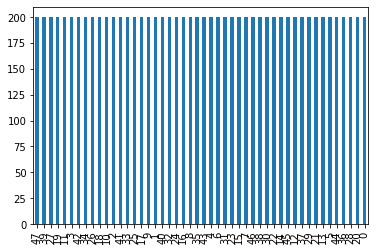

In [20]:
train_set['Label'].value_counts().plot(kind='bar')

In [22]:
train_set.shape

(9600, 3)

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(
    train_set['image_location'], train_set['Label'], test_size=0.15, 
    random_state=RANDOM_STATE, stratify=train_set['Label'])

In [26]:
X_valid.shape, y_valid.shape

((1440,), (1440,))

In [28]:
X_valid.head()

820     ./Train/testset/507055.jpeg
3002    ./Train/testset/199148.jpeg
8931    ./Train/testset/545086.jpeg
2826    ./Train/testset/525293.jpeg
3760    ./Train/testset/558507.jpeg
Name: image_location, dtype: object

In [30]:
X_valid.to_csv('../data/raw/validation_set.txt', sep='\n', index=False)

In [31]:
new_train_set = pd.DataFrame({
    'image_name' : X_train,
    'image_label' : y_train
})

In [32]:
new_train_set.head()

,image_name,image_label
7846,./Train/testset/309293.jpeg,41
2079,./Train/testset/697706.jpeg,47
7430,./Train/testset/483222.jpeg,17
6213,./Train/testset/220910.jpeg,24
9390,./Train/testset/724901.jpeg,15


In [33]:
new_train_set.to_csv('../data/raw/Train/new_train_set.csv', index=False)

In [34]:
new_validation_set = pd.DataFrame({
    'image_name' : X_valid,
    'image_label' : y_valid
})

In [35]:
new_validation_set.shape

(1440, 2)

In [36]:
new_validation_set.head()

,image_name,image_label
820,./Train/testset/507055.jpeg,37
3002,./Train/testset/199148.jpeg,1
8931,./Train/testset/545086.jpeg,13
2826,./Train/testset/525293.jpeg,22
3760,./Train/testset/558507.jpeg,0


In [37]:
new_validation_set.to_csv('../data/raw/Valid/new_valid_set.csv', index=False)